# Análise de Regras de Associação com FP-Growth

## Objetivo
Este código realiza uma análise de regras de associação utilizando o algoritmo FP-Growth para identificar padrões de compra frequentes entre produtos, auxiliando na compreensão do comportamento de compra dos clientes.

## Processo de Análise
1. **Preparação dos Dados**
   - Carregamento do arquivo CSV
   - Agrupamento das compras por ID
   - Criação de lista de produtos por compra

2. **Transformação dos Dados**
   - Aplicação de One-Hot Encoding
   - Conversão dos produtos em formato binário
   - Criação de matriz de transações

3. **Aplicação do FP-Growth**
   - Configuração do suporte mínimo (1%)
   - Identificação de itens frequentes
   - Geração de conjuntos de itens

4. **Geração de Regras**
   - Cálculo de métricas:
     - Suporte (support)
     - Confiança (confidence)
     - Lift
   - Filtragem por lift mínimo (1)

5. **Análise dos Resultados**
   - Top 10 regras por:
     - Lift (força da associação)
     - Suporte (frequência)
     - Confiança (probabilidade)

## Métricas Utilizadas
- **Suporte (Support)**: Frequência com que os itens aparecem juntos
- **Confiança (Confidence)**: Probabilidade de compra do consequente dado o antecedente
- **Lift**: Força da associação entre os itens

## Resultado
- Identificação de padrões de compra
- Regras de associação entre produtos
- Insights sobre comportamento do consumidor
- Dados para estratégias de marketing
- Recomendações de produtos relacionados

## Benefícios
- Descoberta de relações entre produtos
- Otimização de estratégias de venda
- Melhoria no posicionamento de produtos
- Aumento potencial de vendas cruzadas
- Insights para ações de marketing

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 📌 1. Carregar o CSV
df = pd.read_csv("novo_arquivo.csv")

# 📌 2. Agrupar as compras
basket = df.groupby('id_da_compra')['produto'].apply(list)

# 📌 3. One-Hot Encoding dos produtos
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 📌 4. Aplicar FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# 📌 5. Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 📌 6. Mostrar os top 10 por cada métrica
rules_selected = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

top_lift = rules_selected.sort_values(by='lift', ascending=False).head(10)
top_support = rules_selected.sort_values(by='support', ascending=False).head(10)
top_confidence = rules_selected.sort_values(by='confidence', ascending=False).head(10)

print("📈 Top 10 Regras por Lift:")
print(top_lift)

print("\n📊 Top 10 Regras por Suporte:")
print(top_support)

print("\n✅ Top 10 Regras por Confiança:")
print(top_confidence)


# 📌 6. Mostrar os resultados
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

📈 Top 10 Regras por Lift:
                   antecedents                consequents   support  \
930    (Cerveja, Refrigerante)                   (Carvão)  0.014900   
935                   (Carvão)    (Cerveja, Refrigerante)  0.014900   
940                  (Cerveja)  (Suco de Laranja, Carvão)  0.013117   
925                   (Carvão)                  (Cerveja)  0.024050   
931     (Carvão, Refrigerante)                  (Cerveja)  0.014900   
934                  (Cerveja)     (Carvão, Refrigerante)  0.014900   
924                  (Cerveja)                   (Carvão)  0.024050   
937  (Suco de Laranja, Carvão)                  (Cerveja)  0.013117   
623            (Arroz, Açúcar)  (Feijão, Molho de Tomate)  0.011067   
622  (Feijão, Molho de Tomate)            (Arroz, Açúcar)  0.011067   

     confidence      lift  
930    0.227076  9.441848  
935    0.619543  9.441848  
940    0.116939  8.915305  
925    1.000000  8.915305  
931    1.000000  8.915305  
934    0.132838  8.91530

,antecedents,consequents,support,confidence,lift
0,(Pasta de Dente),(Sabonete),0.200583,0.669690,2.393460
1,(Sabonete),(Pasta de Dente),0.200583,0.716881,2.393460
2,"(Pasta de Dente, Queijo Mussarela)",(Sabonete),0.034150,0.556491,1.988889
3,"(Sabonete, Queijo Mussarela)",(Pasta de Dente),0.034150,0.604960,2.019788
4,(Pasta de Dente),"(Sabonete, Queijo Mussarela)",0.034150,0.114017,2.019788
...,...,...,...,...,...
937,"(Suco de Laranja, Carvão)",(Cerveja),0.013117,1.000000,8.915305
938,"(Cerveja, Carvão)",(Suco de Laranja),0.013117,0.545392,4.490667
939,(Suco de Laranja),"(Cerveja, Carvão)",0.013117,0.108001,4.490667
940,(Cerveja),"(Suco de Laranja, Carvão)",0.013117,0.116939,8.915305


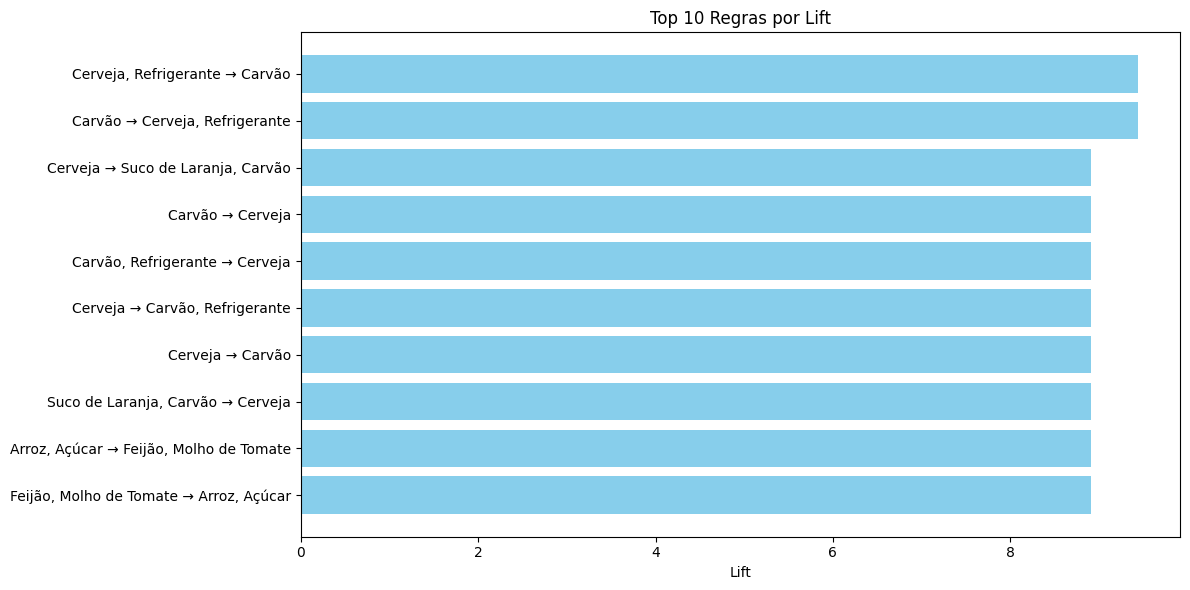

In [2]:
import matplotlib.pyplot as plt

# Converter os conjuntos para strings para exibir no eixo X
top_lift['regra'] = top_lift['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + top_lift['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12,6))
plt.barh(top_lift['regra'], top_lift['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Regras por Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


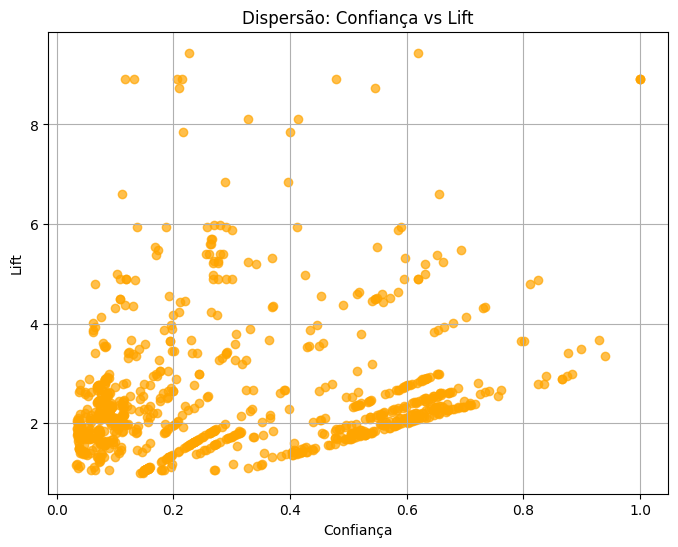

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, color='orange')
plt.xlabel('Confiança')
plt.ylabel('Lift')
plt.title('Dispersão: Confiança vs Lift')
plt.grid(True)
plt.show()